## <center> AMBER Tutorial </center>
# <center> Interactive data analysis with pytraj and Jupyter notebook </center>
### <center> By Hai Nguyen (BSD 2-clause) </center>

## What is Jupyter notebook?

Direct introduction and figure from [Jupyter notebook website](http://jupyter.org/):

"The Jupyter Notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more."

<img src="jupyterpreview.png", width=500>



## What is pytraj?

pytraj is a Python package binding to the popular cpptraj program. pytraj is written do extend the flexibility of cpptraj and to expose cpptraj's functionality to Python's ecossytem, such as numpy, pandas, matplotlib, ...

## What can you learn from this tutorial

- Use Jupyter notebook for interective data exploration

- Use pytraj to perform basis analysis such computing RMSD, center of mass distance, dihedral angles, ...

- Use matplotlib and pandas for analyzing output from pytraj


## Requirement

- [AmberTools >= 16](http://ambermd.org/#AmberTools)
- If you allow AMBER to install Python distribution from Miniconda, you have all needed packages for this tutorial.
- If not, you need to install (either using `pip` or `conda`)
    - matplotlib
    - jupyter notebook
- Install [pandas](http://pandas.pydata.org/): 
    ```bash
     amber.conda install pandas
    ```
- You know how to use Linux command line. If not, please check [basic AMBER tutorial](http://ambermd.org/tutorials/basic/tutorial0/)

## Download requried trajetories, topology

[trpzip2.gb.nc](http://ambermd.org/tutorials/analysis/tutorial1/trpzip2.gb.nc)

[trpzip2.ff10.mbondi2.parm7](http://ambermd.org/tutorials/analysis/tutorial1/trpzip2.ff10.mbondi.parm7)

[trpzip2.1LE1.1.rst7](http://ambermd.org/tutorials/analysis/tutorial1/trpzip2.1LE1.1.rst7)

Or open the website: http://ambermd.org/tutorials/analysis/tutorial1/ and manually download them.

### Start notebook

```bash
$ amber.jupyter notebook
(or jupyter notebook if you did not allow AMBER to install Miniconda)
```

- If you want to use the notebook remotely (run it in your remote cluster and view it in your desktop), please check [remote notebook tutorial]()

- **Note**: This tutorial is written in the Jupyter notebook, so you can [download]() and run it too.

- How to follow this tutorial? Copy and paste each command in this tutorial to the notebook, hit "**Shift-Enter**" to run and to create new Cell. Check **Tips** in the end of this tutorial for useful commands.

- You should expect to see

![](jupyter_open.png)

- Choose New --> Python 2 (or Python 3, depending on which version you're using)

- You should expect to see
![](jupyter_new.png)

Then you can copy/paste and run commands.

### Load trajectory to memory

In [1]:
from __future__ import print_function
import pytraj as pt

traj = pt.load('trpzip2.gb.nc', top='trpzip2.ff10.mbondi.parm7')

### Get some basic information about the trajectory

In [2]:
print(traj)

pytraj.Trajectory, 1201 frames: 
Size: 0.005906 (GB)
<Topology: 220 atoms, 13 residues, 1 mols, non-PBC>
           


### Calculating RMSD, using 1st frame as reference

In this case we are computing mass-weighted RMSD, using all non-hydrogen atoms in residues 1 to 13

In [3]:
data_rmsd_first = pt.rmsd(traj, ref=0, mask=":1-13&!@H*")

print(data_rmsd_first)

[  2.30050392e-07   7.92393865e-01   9.72257525e-01 ...,   2.51047183e+00
   2.44805673e+00   2.33894156e+00]


### Using matplotlib to plot

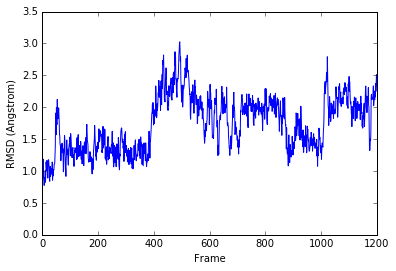

In [4]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.plot(data_rmsd_first)
plt.xlabel('Frame')
plt.ylabel('RMSD (Angstrom)')

### Loading reference structure

In this case, we are loading the NMR structure for trpzip2

In [5]:
# we can reuse loaded topology from `traj`
ref = pt.load('trpzip2.1LE1.1.rst7', top=traj.top)
print(ref)

pytraj.Trajectory, 1 frames: 
Size: 0.000005 (GB)
<Topology: 220 atoms, 13 residues, 1 mols, non-PBC>
           


### Computing RMSD to a Reference

In [6]:
data_rmsd_ref = pt.rmsd(traj, ref=ref, mask=":1-13&!@H*")
print(data_rmsd_ref)

[ 1.28171363  0.98184973  0.95976186 ...,  2.1723379   2.21177339
  2.10760399]


## Plotting two RMSDs

We can plot rmsd to 1st frame (previously calculated) and rmsd to reference (NMR)

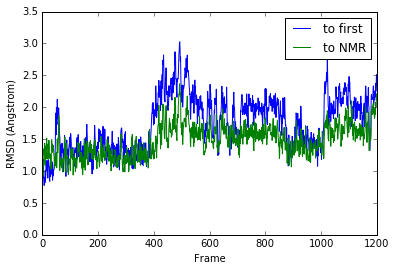

In [7]:
plt.plot(data_rmsd_first, label='to first')
plt.plot(data_rmsd_ref, label='to NMR')
plt.xlabel('Frame')
plt.ylabel('RMSD (Angstrom)')
plt.legend()

### Computing dihedral angles

In this case, we are computing phi and psi angle for residues 2 to 12. We tell pytraj to convert raw data to pandas's DataFrame
to better visualization in notebook

In [8]:
phipsi = pt.multidihedral(traj, resrange='1-12', dhtypes="phi psi", dtype='dataframe')

### Pretty display data

In this case, we only display a part of the data

In [9]:
phipsi.head(5)

,psi_1,phi_2,psi_2,phi_3,psi_3,phi_4,psi_4,phi_5,psi_5,phi_6,...,phi_8,psi_8,phi_9,psi_9,phi_10,psi_10,phi_11,psi_11,phi_12,psi_12
0,143.057238,-71.912049,110.554703,-130.534160,150.355762,-75.439203,136.828950,-166.265268,142.963215,46.199010,...,-156.528812,166.852874,-77.173357,149.844131,-156.764180,179.952233,-112.173492,139.744046,-130.421221,93.645252
1,-178.027486,-90.470814,126.932335,-144.053052,146.266402,-83.644329,130.036725,-149.613451,140.469441,46.385612,...,-155.771388,178.131532,-99.090035,110.484146,-125.722458,156.211368,-90.678489,116.214347,-97.754242,88.744520
2,158.320429,-85.915454,130.576342,-133.877509,156.935094,-97.466250,138.200851,-152.872485,122.812971,50.388597,...,-147.387162,144.354872,-57.108740,149.170294,-162.381292,166.376142,-97.894963,123.384405,-107.740145,140.546132
3,167.771467,-90.353632,129.518734,-124.248887,149.129229,-90.913898,115.232213,-126.890970,132.339599,50.350691,...,-147.218261,142.976192,-64.039680,121.944712,-126.966801,164.214236,-81.268041,128.649117,-139.177379,151.091243
4,171.297894,-124.108373,139.739760,-131.330841,163.535213,-94.040970,131.921428,-140.411407,151.705385,43.331423,...,-145.656883,149.293748,-76.647407,143.642516,-138.920479,173.596284,-115.625705,152.597897,-144.155048,156.090107


### Getting some basic info

In [10]:
phipsi.describe()

,psi_1,phi_2,psi_2,phi_3,psi_3,phi_4,psi_4,phi_5,psi_5,phi_6,...,phi_8,psi_8,phi_9,psi_9,phi_10,psi_10,phi_11,psi_11,phi_12,psi_12
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,...,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,139.778710,-82.626524,138.210104,-136.755794,144.030171,-84.227620,131.166893,-143.707816,105.065698,42.818831,...,-133.038724,140.161090,-98.861452,136.386463,-142.973055,143.382122,-91.975208,131.600521,-127.762462,138.960641
std,66.915955,15.389925,14.920240,12.014833,38.877590,16.317879,12.427970,13.340660,39.313901,27.917397,...,17.705276,72.724102,22.269541,15.230773,12.746998,63.335667,15.849408,14.605431,15.254602,48.709939
min,-179.778953,-148.202476,-178.638121,-165.413872,-179.968761,-147.577326,80.866604,-176.154622,-179.166655,-77.338312,...,-173.267065,-179.915161,-154.605447,-175.036491,-176.621379,-179.784055,-160.690845,5.429666,-168.402552,-179.830909
25%,143.456227,-90.718102,130.981588,-145.049051,140.104800,-94.353636,123.182218,-152.771024,71.362192,42.089928,...,-145.198511,147.098020,-116.261532,128.810010,-151.338311,145.896823,-100.958598,125.783499,-139.094235,137.660151
50%,153.816869,-81.055011,139.469948,-137.983975,147.842524,-82.585343,131.887478,-145.219714,115.641876,49.783825,...,-135.749190,156.955396,-96.528755,137.373226,-144.029940,156.293670,-90.427707,132.943056,-129.764304,149.182601
75%,163.175553,-72.603614,146.270957,-129.647734,156.125693,-73.350432,140.019820,-136.516230,134.998512,55.870465,...,-124.676736,165.426444,-81.110786,144.889034,-135.242810,164.513799,-80.461532,140.355434,-119.242939,158.770225
max,179.975207,-44.855565,168.485502,-73.519375,179.145646,-37.436428,166.331044,-64.705252,176.879019,78.375160,...,-46.422130,179.624114,-46.588036,170.657030,-78.802249,179.993750,-53.556971,166.280275,-46.786585,179.858390


### Plotting dihedral

In this case, we are plotting Psi dihedral for residue 4 (TRP)

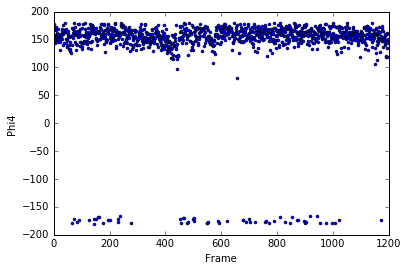

In [11]:
plt.plot(phipsi['psi_8'], '-bo', markersize=3, linewidth=0)
plt.xlabel('Frame')
plt.ylabel('Phi4')

# Get some information about the structure

In [12]:
top = traj.top

for residue in top.residues:
    # Note: In python, 0-based index is used.
    # For example: SER0 should be first residue
    print(residue)

<SER0, 13 atoms>
<TRP1, 24 atoms>
<THR2, 14 atoms>
<TRP3, 24 atoms>
<GLU4, 15 atoms>
<ASN5, 14 atoms>
<GLY6, 7 atoms>
<LYS7, 22 atoms>
<TRP8, 24 atoms>
<THR9, 14 atoms>
<TRP10, 24 atoms>
<LYS11, 22 atoms>
<NHE12, 3 atoms>


In [13]:
traj.top.atomlist[:10]

[Atom(name=N, type=N3, atomic_number=7, index=0, resid=0),
 Atom(name=H1, type=H, atomic_number=1, index=1, resid=0),
 Atom(name=H2, type=H, atomic_number=1, index=2, resid=0),
 Atom(name=H3, type=H, atomic_number=1, index=3, resid=0),
 Atom(name=CA, type=CX, atomic_number=6, index=4, resid=0),
 Atom(name=HA, type=HP, atomic_number=1, index=5, resid=0),
 Atom(name=CB, type=CT, atomic_number=6, index=6, resid=0),
 Atom(name=HB2, type=H1, atomic_number=1, index=7, resid=0),
 Atom(name=HB3, type=H1, atomic_number=1, index=8, resid=0),
 Atom(name=OG, type=OH, atomic_number=8, index=9, resid=0)]

## Tips

- Run bash command: Use !

In [14]:
! echo Hello

Hello


- How to run this notebook?
    
    - Run all commands: **Cell -> Run All**
    - Run each Cell: **Ctrl-Enter**
    - Run each Cell and jump to next Cell: **Shift-Enter**
- How to save all commands to Python script: Choose **File -> Download as -> Python (.py)**
- How to save figures in this notebook: Right click and choose **Save image as** (or similiar command)
- More info? Choose Help -> **Keyboard Shortcuts**

## See also

If you would like to learn more about ``pytraj``, please see unofficial AMBER tutorials for pytraj in [pytraj website](http://amber-md.github.io/pytraj/latest/tutorials/index.html)